# IMPORTING NECESSARY PYTHON PACKAGES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the CSV File

In [4]:
df=pd.read_csv("full_data_unprocessed.csv")

In [5]:
df

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3
0,9/17/2020 3:00,0.0,22.1,84.5,28.9,4
1,9/17/2020 4:00,0.0,22.8,80.7,27.5,4
2,9/17/2020 5:00,0.0,24.1,74.9,25.5,4
3,9/17/2020 6:00,0.0,25.5,70.9,21.3,6
4,9/17/2020 7:00,0.0,25.5,69.6,23.6,7
...,...,...,...,...,...,...
30028,4/27/2024 9:00,0.0,25.0,88.9,161.3,3
30029,4/27/2024 10:00,0.0,27.0,71.2,158.1,4
30030,4/27/2024 11:00,0.0,28.1,55.7,160.7,6
30031,4/27/2024 12:00,0.0,27.0,67.5,152.8,9


In [6]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3
0,9/17/2020 3:00,0.0,22.1,84.5,28.9,4
1,9/17/2020 4:00,0.0,22.8,80.7,27.5,4
2,9/17/2020 5:00,0.0,24.1,74.9,25.5,4
3,9/17/2020 6:00,0.0,25.5,70.9,21.3,6
4,9/17/2020 7:00,0.0,25.5,69.6,23.6,7


In [7]:
df.shape

(30033, 6)

In [8]:
df.info

<bound method DataFrame.info of                   DATE  Precipitation  Temperature  Relative Humidity   PM25  \
0       9/17/2020 3:00            0.0         22.1               84.5   28.9   
1       9/17/2020 4:00            0.0         22.8               80.7   27.5   
2       9/17/2020 5:00            0.0         24.1               74.9   25.5   
3       9/17/2020 6:00            0.0         25.5               70.9   21.3   
4       9/17/2020 7:00            0.0         25.5               69.6   23.6   
...                ...            ...          ...                ...    ...   
30028   4/27/2024 9:00            0.0         25.0               88.9  161.3   
30029  4/27/2024 10:00            0.0         27.0               71.2  158.1   
30030  4/27/2024 11:00            0.0         28.1               55.7  160.7   
30031  4/27/2024 12:00            0.0         27.0               67.5  152.8   
30032  4/27/2024 13:00            0.0         27.1               68.4  146.5   

       

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30033 entries, 0 to 30032
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               30033 non-null  object 
 1   Precipitation      29989 non-null  float64
 2   Temperature        29847 non-null  float64
 3   Relative Humidity  29842 non-null  float64
 4   PM25               29554 non-null  float64
 5   O3                 30033 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [10]:
df.describe()

,Precipitation,Temperature,Relative Humidity,PM25,O3
count,29989.000000,29847.000000,29842.000000,29554.000000,30033.000000
mean,0.101164,18.316273,75.214128,52.560780,21.617154
std,0.982790,6.310975,22.875189,42.645976,15.226338
min,0.000000,1.900000,6.100000,0.000000,0.000000
25%,0.000000,13.600000,58.600000,20.900000,9.000000
50%,0.000000,19.600000,80.800000,40.800000,19.000000
75%,0.000000,22.800000,96.500000,73.400000,32.000000
max,44.200000,32.900000,100.000000,662.900000,93.000000


# VISION OVER COLUMNS

In [12]:
list(df.columns)

['DATE', 'Precipitation', 'Temperature', 'Relative Humidity', 'PM25', 'O3']

# HANDLING MISSING VALUES

In [14]:
df.isnull().sum()

DATE                   0
Precipitation         44
Temperature          186
Relative Humidity    191
PM25                 479
O3                     0
dtype: int64

# LISTING THE CATEGORICAL AND THE NUMERICAL COLUMNS


In [16]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

In [17]:
df[numerical_columns].isnull().sum()

Precipitation         44
Temperature          186
Relative Humidity    191
PM25                 479
O3                     0
dtype: int64

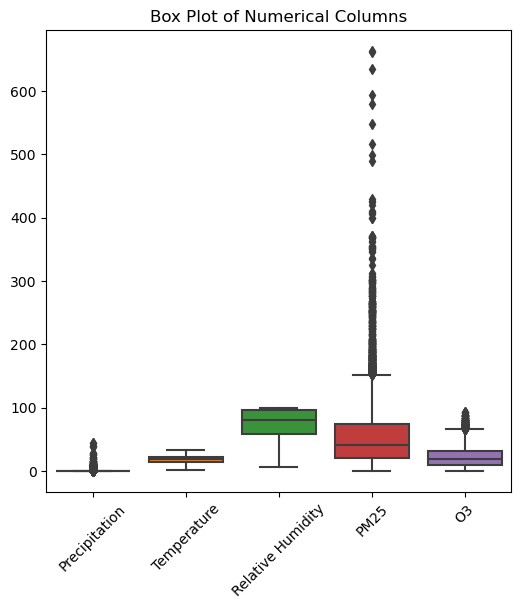

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns')
plt.show()

In [19]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median()) #MANY OUTLIERS, SO USED MEDIAN FOR FILLING MISSING VALUES
df[numerical_columns].isnull().sum()

Precipitation        0
Temperature          0
Relative Humidity    0
PM25                 0
O3                   0
dtype: int64

In [20]:
df['PM25'].median()

40.8

In [21]:
df['Precipitation'].median()

0.0

In [22]:
df['Temperature'].median()

19.6

In [23]:
df['Relative Humidity'].median()

80.8

# FUNCTION TO DETECT OUTLIERS USING IQR METHOD AND RETURN COLUMN-WISE BOOLEAN IINDICATORS

In [25]:
def find_outliers_iqr(data):
    outliers_mask=pd.Series(index=data.columns,dtype=bool)
    for col in data.columns:
        if col in numerical_columns: #Process only numerical columns
            Q1=data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q1+1.5*IQR
            col_outliers_mask=(data[col]<lower_bound)|(data[col]>upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #True if any outliers detected
    return outliers_mask

outliers_iqr_mask=find_outliers_iqr(df)
print("Outliers detected using IQR method: ")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method: 
DATE:True
Precipitation:True
Temperature:True
Relative Humidity:False
PM25:True
O3:True


In [26]:
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")


Outliers detected using Z-score method:
DATE: True
Precipitation: True
Temperature: False
Relative Humidity: True
PM25: True
O3: True


# Explanatory Data Analysis

In [28]:
numeric_data=df[numerical_columns]
# Compute pairwise correlation of numeric columns
correlation_matrix=numeric_data.corr()

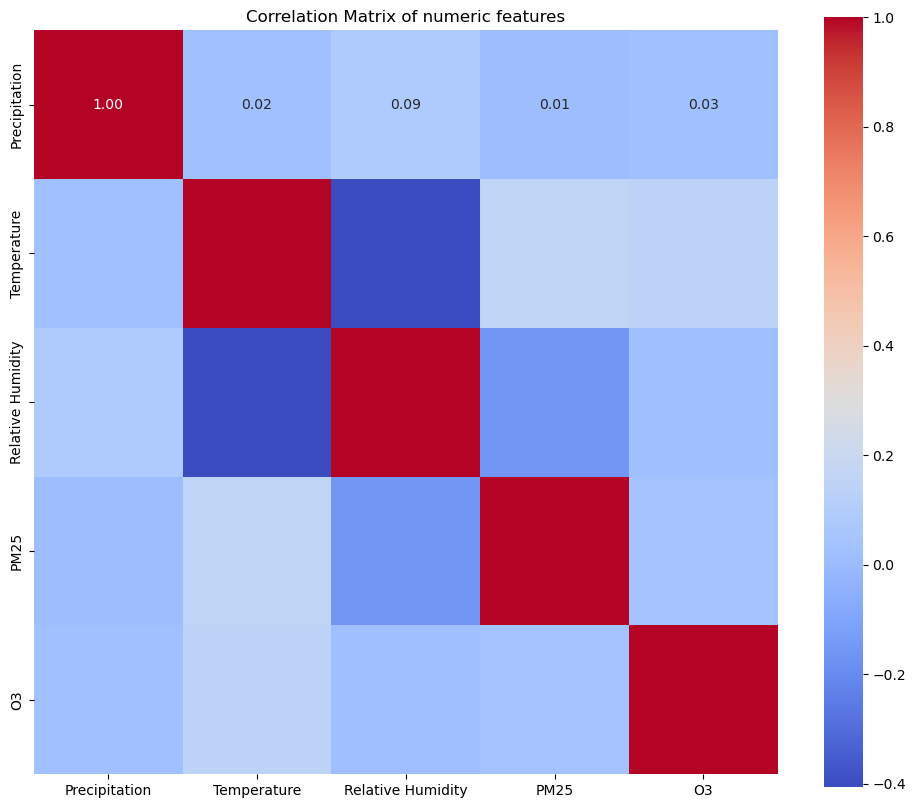

In [29]:
#plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title('Correlation Matrix of numeric features')
plt.show()

In [30]:
df.to_csv('full_data_filtered.csv',index=False)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

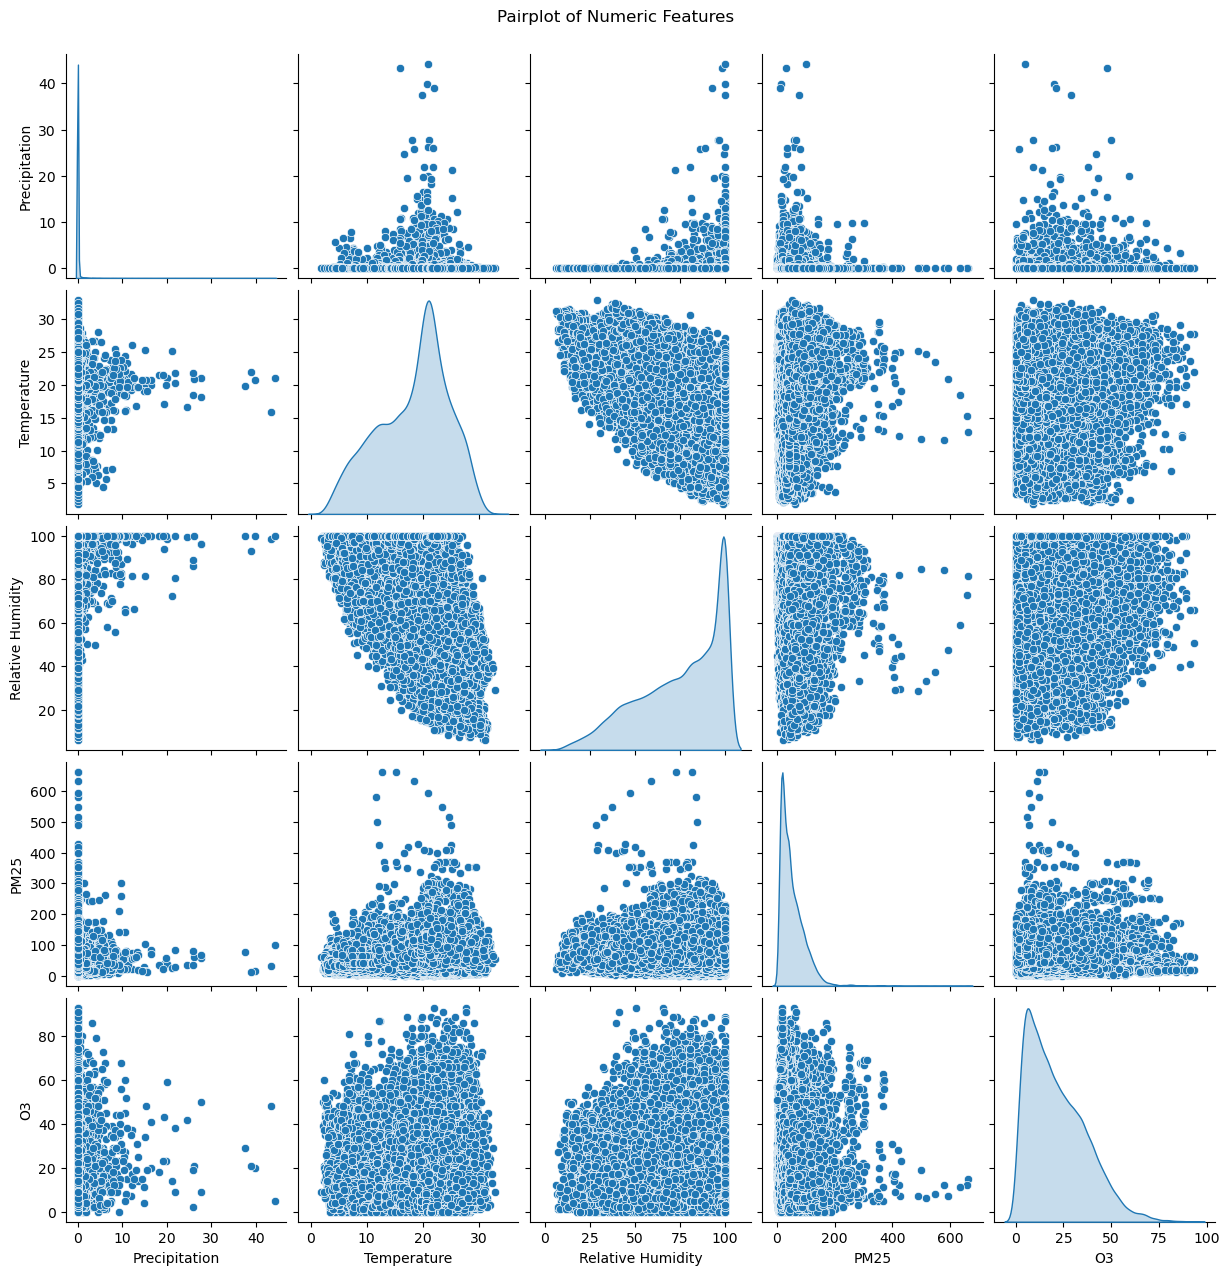

In [31]:
# Pairplot of numeric features
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features',y=1.02)
plt.show()

# Loading and Working with the Filtered Datasets and Analysis of the data

In [33]:
import pandas as pd
data=pd.read_csv('filtered_data.csv')
data.head(60)

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3
0,9/17/2020 3:00,0.0,22.1,84.5,28.9,4
1,9/17/2020 4:00,0.0,22.8,80.7,27.5,4
2,9/17/2020 5:00,0.0,24.1,74.9,25.5,4
3,9/17/2020 6:00,0.0,25.5,70.9,21.3,6
4,9/17/2020 7:00,0.0,25.5,69.6,23.6,7
5,9/17/2020 8:00,0.0,25.0,70.9,24.3,12
6,9/17/2020 9:00,0.0,25.1,72.3,26.6,14
7,9/17/2020 10:00,0.0,25.1,72.5,26.8,20
8,9/17/2020 11:00,0.0,24.9,73.9,26.9,23
9,9/17/2020 12:00,0.0,24.3,74.6,28.7,30


In [34]:
numerical_cols=data.select_dtypes(exclude=['category','object']).columns
category_cols=data.select_dtypes(include=['category','object']).columns
numerical_cols

Index(['Precipitation', 'Temperature', 'Relative Humidity', 'PM25', 'O3'], dtype='object')

In [35]:
category_cols

Index(['DATE'], dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
import pandas as pd

df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y %H:%M')

In [38]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7


In [39]:
df['day'] = df['DATE'].dt.day
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['hour'] = df['DATE'].dt.hour
df['minute'] = df['DATE'].dt.minute
df['day_of_week'] = df['DATE'].dt.day_name()

In [40]:
# Label encoding for categorical columns
le_day_of_week = LabelEncoder()
le_day = LabelEncoder()
le_month = LabelEncoder()
le_year = LabelEncoder()
le_hour = LabelEncoder()
le_minute = LabelEncoder()


In [41]:

df['day_of_week_encoded'] = le_day_of_week.fit_transform(df['day_of_week'])
df['day_encoded'] = le_day.fit_transform(df['day'])
df['month_encoded'] = le_month.fit_transform(df['month'])
df['year_encoded'] = le_year.fit_transform(df['year'])
df['hour_encoded'] = le_hour.fit_transform(df['hour'])
df['minute_encoded'] = le_minute.fit_transform(df['minute'])

In [42]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,minute,day_of_week,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,0,Thursday,4,16,8,0,3,0
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,0,Thursday,4,16,8,0,4,0
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,0,Thursday,4,16,8,0,5,0
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,0,Thursday,4,16,8,0,6,0
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,0,Thursday,4,16,8,0,7,0


In [43]:
df

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,minute,day_of_week,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,0,Thursday,4,16,8,0,3,0
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,0,Thursday,4,16,8,0,4,0
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,0,Thursday,4,16,8,0,5,0
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,0,Thursday,4,16,8,0,6,0
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,0,Thursday,4,16,8,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30028,2024-04-27 09:00:00,0.0,25.0,88.9,161.3,3,27,4,2024,9,0,Saturday,2,26,3,4,9,0
30029,2024-04-27 10:00:00,0.0,27.0,71.2,158.1,4,27,4,2024,10,0,Saturday,2,26,3,4,10,0
30030,2024-04-27 11:00:00,0.0,28.1,55.7,160.7,6,27,4,2024,11,0,Saturday,2,26,3,4,11,0
30031,2024-04-27 12:00:00,0.0,27.0,67.5,152.8,9,27,4,2024,12,0,Saturday,2,26,3,4,12,0


# CHANGING O3 VALUE TO AQI

In [45]:
import pandas as pd

def cal_o3qi(O3):
    # Convert ppb to ppm
    o3_ppm = O3 / 1000
    
    # Breakpoints for ozone (O3) in ppm (parts per million)
    breakpoints = [
        (0.000, 0.054, 0, 50),
        (0.055, 0.070, 51, 100),
        (0.071, 0.085, 101, 150),
        (0.086, 0.105, 151, 200),
        (0.106, 0.200, 201, 300)
    ]
    
    # Check the ozone concentration range and calculate AQI
    for (C_low, C_high, I_low, I_high) in breakpoints:
        if C_low <= o3_ppm <= C_high:
            aqi1 = ((I_high - I_low) / (C_high - C_low)) * (o3_ppm - C_low) + I_low
            return round(aqi1)
    
    # If the concentration is outside the provided ranges
    return 0

df['O3QI'] = df['O3'].apply(cal_o3qi)

data1 = df[['O3', 'O3QI']]
data1.head()




,O3,O3QI
0,4,4
1,4,4
2,4,4
3,6,6
4,7,6


In [46]:
data1

,O3,O3QI
0,4,4
1,4,4
2,4,4
3,6,6
4,7,6
...,...,...
30028,3,3
30029,4,4
30030,6,6
30031,9,8


# CHANGING PM2.5 VALUE TO AQI

In [48]:
import pandas as pd

# Define the PM2.5 to AQI conversion function
def cal_pm25aqi(PM25):
    breakpoints = [
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500)
    ]
    for (C_low, C_high, I_low, I_high) in breakpoints:
        if C_low <= PM25 <= C_high:
            aqi = ((I_high - I_low) / (C_high - C_low)) * (PM25 - C_low) + I_low
            return round(aqi)
    return 0


df['PM25QI'] = df['PM25'].apply(cal_pm25aqi)

data2 = df[['PM25', 'PM25QI']]
data2.head()


,PM25,PM25QI
0,28.9,86
1,27.5,83
2,25.5,79
3,21.3,70
4,23.6,75


In [49]:
data2

,PM25,PM25QI
0,28.9,86
1,27.5,83
2,25.5,79
3,21.3,70
4,23.6,75
...,...,...
30028,161.3,212
30029,158.1,209
30030,160.7,211
30031,152.8,203


In [50]:
df

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,minute,day_of_week,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded,O3QI,PM25QI
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,0,Thursday,4,16,8,0,3,0,4,86
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,0,Thursday,4,16,8,0,4,0,4,83
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,0,Thursday,4,16,8,0,5,0,4,79
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,0,Thursday,4,16,8,0,6,0,6,70
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,0,Thursday,4,16,8,0,7,0,6,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30028,2024-04-27 09:00:00,0.0,25.0,88.9,161.3,3,27,4,2024,9,0,Saturday,2,26,3,4,9,0,3,212
30029,2024-04-27 10:00:00,0.0,27.0,71.2,158.1,4,27,4,2024,10,0,Saturday,2,26,3,4,10,0,4,209
30030,2024-04-27 11:00:00,0.0,28.1,55.7,160.7,6,27,4,2024,11,0,Saturday,2,26,3,4,11,0,6,211
30031,2024-04-27 12:00:00,0.0,27.0,67.5,152.8,9,27,4,2024,12,0,Saturday,2,26,3,4,12,0,8,203


# COMPARING O3 AND PM2.5 VALUE AND GENERATING AQI

In [52]:
df['AQI'] = df[['O3QI', 'PM25QI']].max(axis=1)

In [53]:
df

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,...,day_of_week,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded,O3QI,PM25QI,AQI
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,...,Thursday,4,16,8,0,3,0,4,86,86
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,...,Thursday,4,16,8,0,4,0,4,83,83
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,...,Thursday,4,16,8,0,5,0,4,79,79
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,...,Thursday,4,16,8,0,6,0,6,70,70
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,...,Thursday,4,16,8,0,7,0,6,75,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30028,2024-04-27 09:00:00,0.0,25.0,88.9,161.3,3,27,4,2024,9,...,Saturday,2,26,3,4,9,0,3,212,212
30029,2024-04-27 10:00:00,0.0,27.0,71.2,158.1,4,27,4,2024,10,...,Saturday,2,26,3,4,10,0,4,209,209
30030,2024-04-27 11:00:00,0.0,28.1,55.7,160.7,6,27,4,2024,11,...,Saturday,2,26,3,4,11,0,6,211,211
30031,2024-04-27 12:00:00,0.0,27.0,67.5,152.8,9,27,4,2024,12,...,Saturday,2,26,3,4,12,0,8,203,203


In [54]:

df['AQI_Category'] = df['AQI'].apply(
    lambda x: "Good" if x <= 50 else
              "Moderate" if 51 <= x <= 100 else
              "Unhealthy for Sensitive Groups" if 101 <= x <= 150 else
              "Unhealthy" if 151 <= x <= 200 else
              "Very Unhealthy" if 201 <= x <= 300 else
              "Hazardous"
)



In [55]:
df

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,...,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded,O3QI,PM25QI,AQI,AQI_Category
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,...,4,16,8,0,3,0,4,86,86,Moderate
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,...,4,16,8,0,4,0,4,83,83,Moderate
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,...,4,16,8,0,5,0,4,79,79,Moderate
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,...,4,16,8,0,6,0,6,70,70,Moderate
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,...,4,16,8,0,7,0,6,75,75,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30028,2024-04-27 09:00:00,0.0,25.0,88.9,161.3,3,27,4,2024,9,...,2,26,3,4,9,0,3,212,212,Very Unhealthy
30029,2024-04-27 10:00:00,0.0,27.0,71.2,158.1,4,27,4,2024,10,...,2,26,3,4,10,0,4,209,209,Very Unhealthy
30030,2024-04-27 11:00:00,0.0,28.1,55.7,160.7,6,27,4,2024,11,...,2,26,3,4,11,0,6,211,211,Very Unhealthy
30031,2024-04-27 12:00:00,0.0,27.0,67.5,152.8,9,27,4,2024,12,...,2,26,3,4,12,0,8,203,203,Very Unhealthy


# DATA INCLUDING ENCODED DATE AND AQI 

In [57]:
df.to_csv('date_and_aqi_filtereds.csv',index=False)

# Loading and Working with the Filtered Datasets and Analysis of the data

In [59]:
import pandas as pd
data=pd.read_csv('date_and_aqi_filtereds.csv')
data.head(60)

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,...,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded,O3QI,PM25QI,AQI,AQI_Category
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,...,4,16,8,0,3,0,4,86,86,Moderate
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,...,4,16,8,0,4,0,4,83,83,Moderate
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,...,4,16,8,0,5,0,4,79,79,Moderate
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,...,4,16,8,0,6,0,6,70,70,Moderate
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,...,4,16,8,0,7,0,6,75,75,Moderate
5,2020-09-17 08:00:00,0.0,25.0,70.9,24.3,12,17,9,2020,8,...,4,16,8,0,8,0,11,77,77,Moderate
6,2020-09-17 09:00:00,0.0,25.1,72.3,26.6,14,17,9,2020,9,...,4,16,8,0,9,0,13,81,81,Moderate
7,2020-09-17 10:00:00,0.0,25.1,72.5,26.8,20,17,9,2020,10,...,4,16,8,0,10,0,19,82,82,Moderate
8,2020-09-17 11:00:00,0.0,24.9,73.9,26.9,23,17,9,2020,11,...,4,16,8,0,11,0,21,82,82,Moderate
9,2020-09-17 12:00:00,0.0,24.3,74.6,28.7,30,17,9,2020,12,...,4,16,8,0,12,0,28,86,86,Moderate


In [60]:
df

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,...,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded,O3QI,PM25QI,AQI,AQI_Category
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,...,4,16,8,0,3,0,4,86,86,Moderate
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,...,4,16,8,0,4,0,4,83,83,Moderate
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,...,4,16,8,0,5,0,4,79,79,Moderate
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,...,4,16,8,0,6,0,6,70,70,Moderate
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,...,4,16,8,0,7,0,6,75,75,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30028,2024-04-27 09:00:00,0.0,25.0,88.9,161.3,3,27,4,2024,9,...,2,26,3,4,9,0,3,212,212,Very Unhealthy
30029,2024-04-27 10:00:00,0.0,27.0,71.2,158.1,4,27,4,2024,10,...,2,26,3,4,10,0,4,209,209,Very Unhealthy
30030,2024-04-27 11:00:00,0.0,28.1,55.7,160.7,6,27,4,2024,11,...,2,26,3,4,11,0,6,211,211,Very Unhealthy
30031,2024-04-27 12:00:00,0.0,27.0,67.5,152.8,9,27,4,2024,12,...,2,26,3,4,12,0,8,203,203,Very Unhealthy


In [62]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,...,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded,O3QI,PM25QI,AQI,AQI_Category
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,...,4,16,8,0,3,0,4,86,86,Moderate
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,...,4,16,8,0,4,0,4,83,83,Moderate
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,...,4,16,8,0,5,0,4,79,79,Moderate
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,...,4,16,8,0,6,0,6,70,70,Moderate
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,...,4,16,8,0,7,0,6,75,75,Moderate


In [63]:
df.drop(columns=['DATE','PM25','O3','day','month','year','hour','minute','day_of_week','O3QI','PM25QI'],axis=1,inplace=True)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30033 entries, 0 to 30032
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Precipitation        30033 non-null  float64
 1   Temperature          30033 non-null  float64
 2   Relative Humidity    30033 non-null  float64
 3   day_of_week_encoded  30033 non-null  int32  
 4   day_encoded          30033 non-null  int64  
 5   month_encoded        30033 non-null  int64  
 6   year_encoded         30033 non-null  int64  
 7   hour_encoded         30033 non-null  int64  
 8   minute_encoded       30033 non-null  int64  
 9   AQI                  30033 non-null  int64  
 10  AQI_Category         30033 non-null  object 
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 2.4+ MB


In [65]:
numerical_cols=df.select_dtypes(exclude=['category','object']).columns
category_cols=df.select_dtypes(include=['category','object']).columns
numerical_cols

Index(['Precipitation', 'Temperature', 'Relative Humidity',
       'day_of_week_encoded', 'day_encoded', 'month_encoded', 'year_encoded',
       'hour_encoded', 'minute_encoded', 'AQI'],
      dtype='object')

In [66]:
category_cols

Index(['AQI_Category'], dtype='object')

# CHANGING NUMERICAL COLUMNS TO STANDARD SCALAR VALUE

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#Assuming encoded_data is already created from one-hot encoding
#numerical-cols should be defined earlier as numerical columns from the dataset
#Pipeline for numerical columns
numerical_pipeline=Pipeline([('scaler',StandardScaler())])
#Transform numerical columns
numerical_data=numerical_pipeline.fit_transform(data[numerical_cols])
#Convert transformed numerical data back to Dataframe
numerical_data_df=pd.DataFrame(numerical_data,columns=numerical_cols)



In [69]:
numerical_data_df


,Precipitation,Temperature,Relative Humidity,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded,AQI
0,-0.102861,0.600082,0.405605,0.501118,0.139171,0.759077,-1.781670,-1.226729,0.0,-0.589824
1,-0.102861,0.711332,0.238985,0.501118,0.139171,0.759077,-1.781670,-1.082342,0.0,-0.647270
2,-0.102861,0.917941,-0.015331,0.501118,0.139171,0.759077,-1.781670,-0.937956,0.0,-0.723864
3,-0.102861,1.140442,-0.190722,0.501118,0.139171,0.759077,-1.781670,-0.793570,0.0,-0.896201
4,-0.102861,1.140442,-0.247724,0.501118,0.139171,0.759077,-1.781670,-0.649183,0.0,-0.800458
...,...,...,...,...,...,...,...,...,...,...
30028,-0.102861,1.060977,0.598535,-0.498953,1.274406,-0.659128,1.834529,-0.360411,0.0,1.822889
30029,-0.102861,1.378836,-0.177567,-0.498953,1.274406,-0.659128,1.834529,-0.216024,0.0,1.765443
30030,-0.102861,1.553658,-0.857205,-0.498953,1.274406,-0.659128,1.834529,-0.071638,0.0,1.803740
30031,-0.102861,1.378836,-0.339804,-0.498953,1.274406,-0.659128,1.834529,0.072748,0.0,1.650552


In [70]:
numerical_data_df['AQI_Category'] = data['AQI_Category'].values

In [71]:
numerical_data_df


,Precipitation,Temperature,Relative Humidity,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded,AQI,AQI_Category
0,-0.102861,0.600082,0.405605,0.501118,0.139171,0.759077,-1.781670,-1.226729,0.0,-0.589824,Moderate
1,-0.102861,0.711332,0.238985,0.501118,0.139171,0.759077,-1.781670,-1.082342,0.0,-0.647270,Moderate
2,-0.102861,0.917941,-0.015331,0.501118,0.139171,0.759077,-1.781670,-0.937956,0.0,-0.723864,Moderate
3,-0.102861,1.140442,-0.190722,0.501118,0.139171,0.759077,-1.781670,-0.793570,0.0,-0.896201,Moderate
4,-0.102861,1.140442,-0.247724,0.501118,0.139171,0.759077,-1.781670,-0.649183,0.0,-0.800458,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
30028,-0.102861,1.060977,0.598535,-0.498953,1.274406,-0.659128,1.834529,-0.360411,0.0,1.822889,Very Unhealthy
30029,-0.102861,1.378836,-0.177567,-0.498953,1.274406,-0.659128,1.834529,-0.216024,0.0,1.765443,Very Unhealthy
30030,-0.102861,1.553658,-0.857205,-0.498953,1.274406,-0.659128,1.834529,-0.071638,0.0,1.803740,Very Unhealthy
30031,-0.102861,1.378836,-0.339804,-0.498953,1.274406,-0.659128,1.834529,0.072748,0.0,1.650552,Very Unhealthy


# IMPLEMENTING A DECISION TREE

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score
import os
import joblib #For saving the model
#Extra feature(x) and target variable(y)
X=numerical_data_df.drop('AQI_Category',axis=1)
Y=numerical_data_df['AQI_Category']
#convert target variable to numerical
Y=Y.map({'Good': 0,
    'Moderate': 1,
    'Unhealthy for Sensitive Groups': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4,
    'Hazardous': 5})
#Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Initialize logistic regression model
model = LogisticRegression()

In [74]:
from sklearn.tree import DecisionTreeRegressor
# Initialize Decision Tree classifier
model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [75]:
# Predict on training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(Y_test, Y_test_pred)
print('Confusion Matrix:')
print(cm)

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[ 461    0    0    0    0    0]
 [   0 2161    0    0    0    0]
 [   0    0 1230    0    0    0]
 [   0    0    0 2016    0    0]
 [   0    0    0    0  116    0]
 [   0    0    0    0    0   23]]


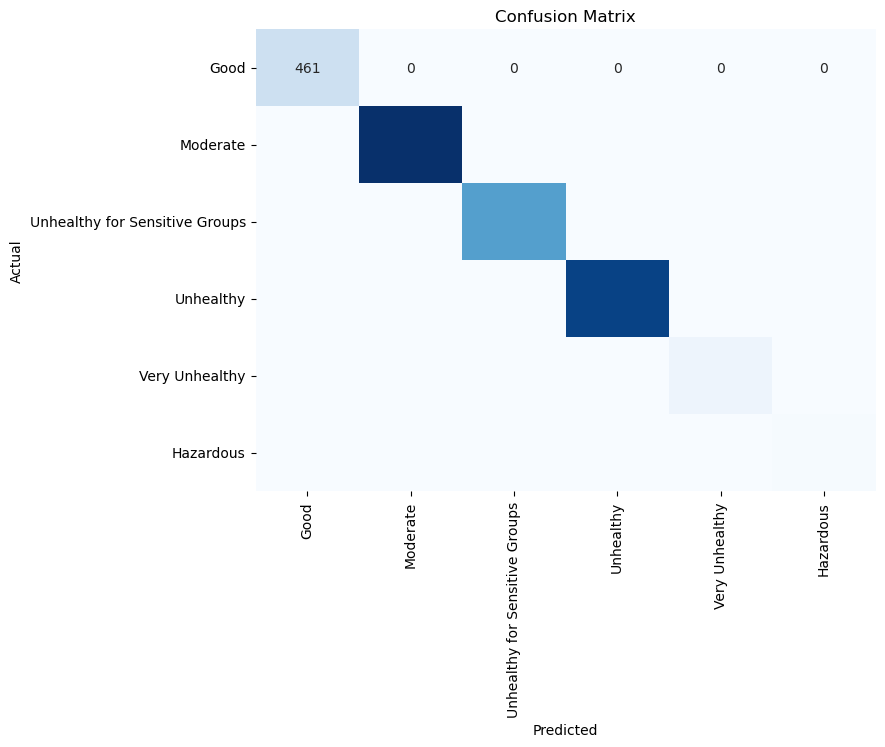

In [76]:
# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'], yticklabels=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [77]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [78]:
rmse = mean_squared_error(Y_test, Y_test_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 0.0


In [79]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_model'):
    os.makedirs('ML_model')

model_path = 'ML_model/decision_regressor_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_model/decision_regressor_model.pkl


# RANDOM FOREST

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [82]:
# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

In [83]:
# Fit the model
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [84]:
# Predict on training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)


In [85]:
# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Testing Accuracy: 1.00


In [86]:
# Generate confusion matrix for test set
cm = confusion_matrix(Y_test, Y_test_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 461    0    0    0    0    0]
 [   0 2161    0    0    0    0]
 [   0    0 1230    0    0    0]
 [   0    0    0 2016    0    0]
 [   0    0    0    0  116    0]
 [   0    0    0    0    0   23]]


In [87]:
# Save the model to a folder named 'ML_model'
if not os.path.exists('ML_model'):
    os.makedirs('ML_model')

model_path = 'ML_model/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_model/random_forest_model.pkl


# KNN

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model


In [90]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000,random_state=42)

# Fit the model
model.fit(X_train, Y_train)




LogisticRegression(max_iter=1000, random_state=42)

In [91]:
# Predict on training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(Y_test, Y_test_pred)
print('Confusion Matrix:')
print(cm)


Training Accuracy: 0.98
Testing Accuracy: 0.98
Confusion Matrix:
[[ 431   30    0    0    0    0]
 [   0 2161    0    0    0    0]
 [   0    3 1173   54    0    0]
 [   0    0    0 2016    0    0]
 [   0    0    0   35   80    1]
 [   0    0    0    0    0   23]]


In [92]:
model_path = 'ML_model/knn.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_model/knn.pkl


# NAIVE BAYES

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model


In [95]:
# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, Y_train)


GaussianNB()

Training Accuracy: 0.96
Testing Accuracy: 0.96
Confusion Matrix:
[[ 416   45    0    0    0    0]
 [   5 2070   83    1    0    2]
 [   0   10 1148   72    0    0]
 [   0    0    5 2000   11    0]
 [   0    0    0    2  104   10]
 [   0    0    0    0    0   23]]


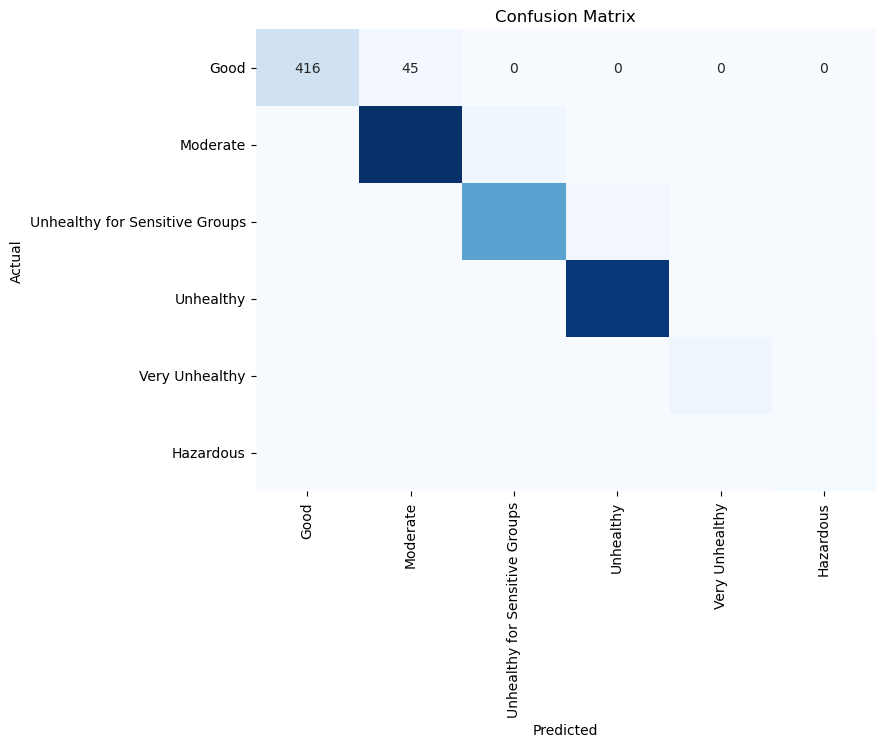

In [96]:
# Predict on training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(Y_test, Y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'], yticklabels=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_model'):
    os.makedirs('ML_model')

model_path = 'ML_model/naive_bayes_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


Model saved at ML_model/naive_bayes_model.pkl
